In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd

# Load the data from the CSV file
netflix_data = pd.read_csv('/kaggle/input/netflix-title-data-2008-2018/netflix_titles 2.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9/9/19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9/9/16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,9/8/18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,9/8/18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,9/8/17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


To gauge Netflix's success in the movie and TV show industry based on the given dataset, we might consider the following factors:

**Growth Over Time:** This could be determined by the number of titles added to Netflix each year.
**Diversity of Content:** By examining the range of countries producing content and the range of genres, we can determine how diversified Netflix's content is.
**Ratings Distribution:** While the dataset does not have viewer counts or ratings from audiences, it does provide content ratings (e.g., TV-MA, TV-PG). A distribution of these ratings can give insight into the type of content Netflix is hosting and its potential audience reach.

Let's start by visualizing the growth of Netflix's content over time:

<h1> Visualization 1: Number of Titles Added to Netflix Each Year </h1>

We'll first check the distribution of movies and TV shows added to Netflix over the years.

/tmp/ipykernel_32/2420778207.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  netflix_data['year_added'] = pd.to_datetime(netflix_data['date_added']).dt.year
/tmp/ipykernel_32/2420778207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data_cleaned['year_added'] = netflix_data_cleaned['year_added'].astype(int)


NameError: name 'false' is not defined

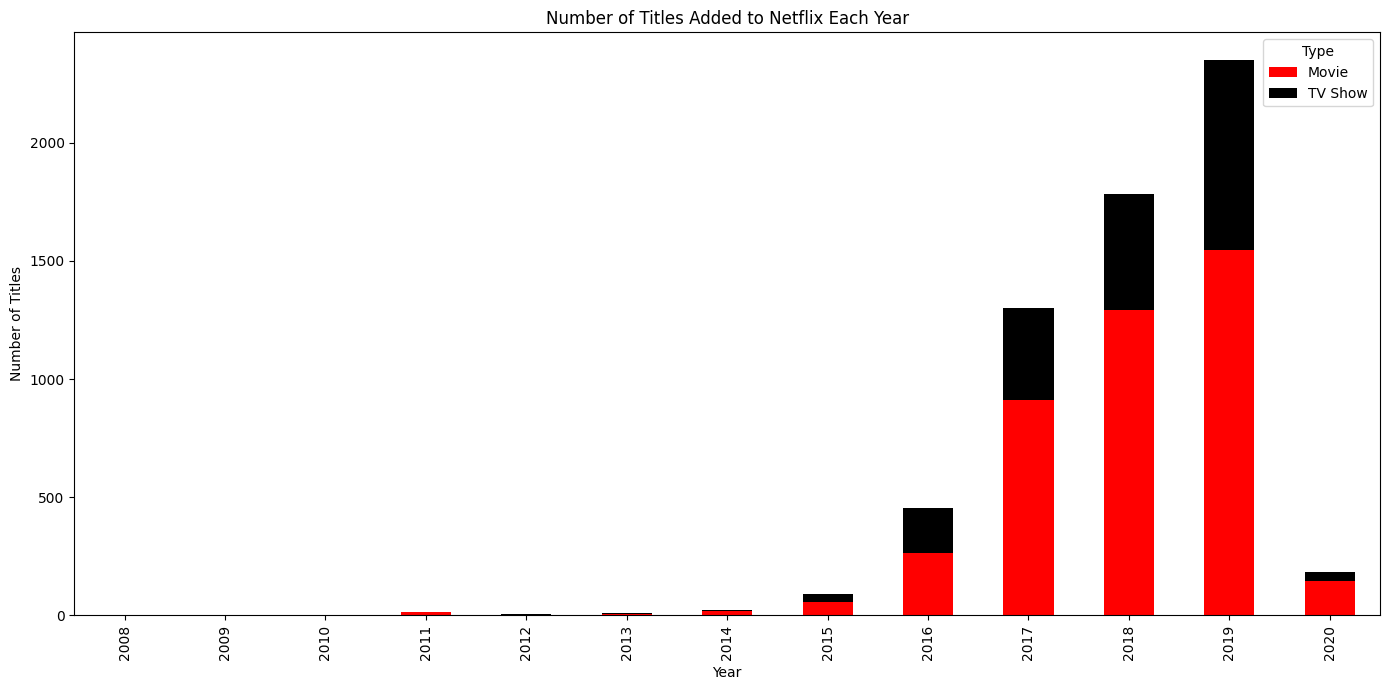

In [9]:
import matplotlib.pyplot as plt

# Convert 'date_added' to datetime format and extract the year
netflix_data['year_added'] = pd.to_datetime(netflix_data['date_added']).dt.year

# Drop NaN values in 'year_added'
netflix_data_cleaned = netflix_data.dropna(subset=['year_added'])
netflix_data_cleaned['year_added'] = netflix_data_cleaned['year_added'].astype(int)

# Group by 'year_added' and 'type' to get counts of movies and TV shows added each year
titles_by_year = netflix_data_cleaned.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 7))
titles_by_year.plot(kind='bar', stacked=True, figsize=(14,7), ax=plt.gca(), color=['red','black'])
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.grid(false)
plt.show()


The graph illustrates the number of titles (both movies and TV shows) added to Netflix each year. 

**Key observations:**

**Rapid Growth:** There's a noticeable growth in the number of titles added to Netflix over the years. This indicates an aggressive expansion and investment in content.

**Movies vs. TV Shows:** While Netflix has continuously added movies each year, there's a significant uptick in the addition of TV shows, especially in the recent years. This could be due to Netflix's focus on producing and acquiring episodic content.

<h1>Visualization 2: Top 10 Countries Producing Content for Netflix</h1>
    
To understand Netflix's global reach and content diversity, it's helpful to see which countries are producing the most content available on the platform. Let's visualize the top 10 countries based on the number of titles they've produced.

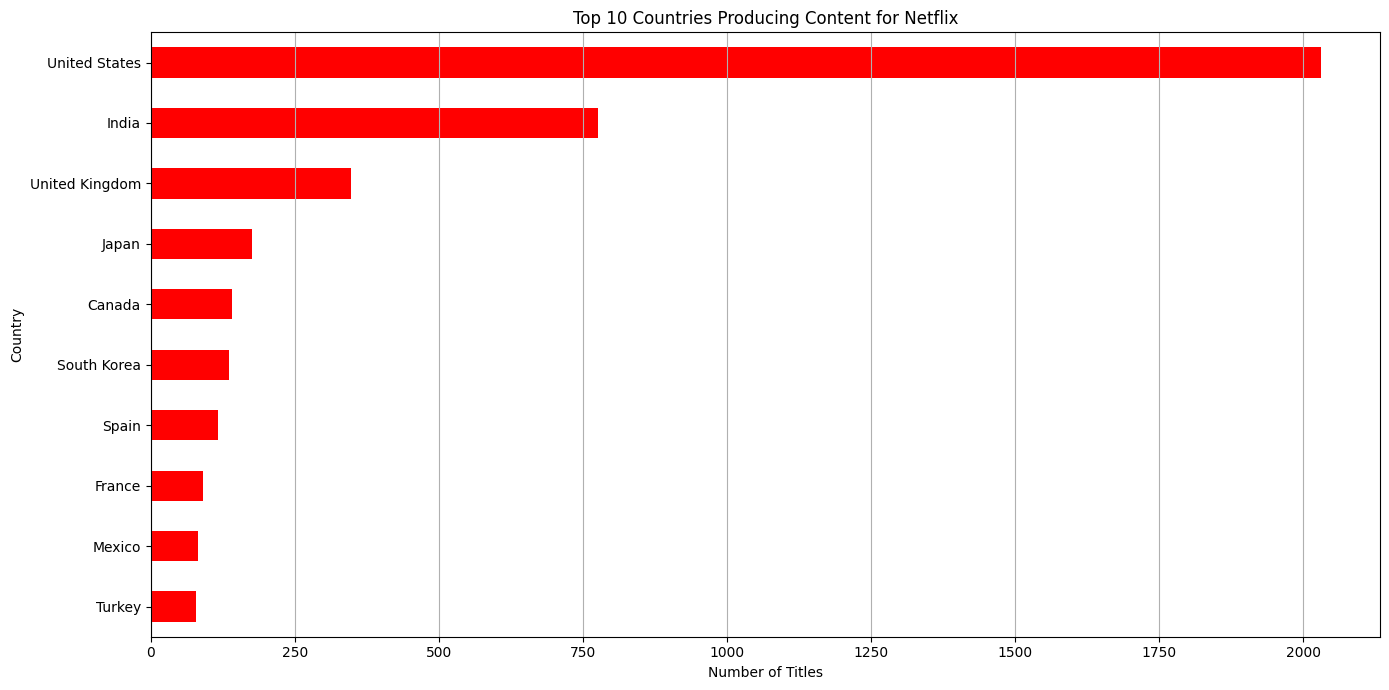

In [11]:
# Grouping by 'country' and counting the titles
country_counts = netflix_data['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(14, 7))
country_counts.plot(kind='barh', color='red')
plt.title('Top 10 Countries Producing Content for Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # To display the country with the highest count at the top
plt.tight_layout()
plt.grid(axis='x')
plt.show()

The bar chart illustrates the top 10 countries producing content for Netflix:

1. **United States Dominance:** The United States is the clear leader in terms of the number of titles on Netflix, which is expected given that Netflix originated there.
2. **Diverse Content:** Countries like India, the United Kingdom, Canada, and others also have a significant presence, indicating Netflix's global reach and its commitment to providing diverse content to its audience.

<h1> Visualization 3: Distribution of Content Ratings on Netflix</h1>

The content rating provides insight into the intended audience for a title. By examining the distribution of these ratings, we can infer the type of audience Netflix is targeting. Let's visualize the distribution of content ratings for both movies and TV shows on Netflix.

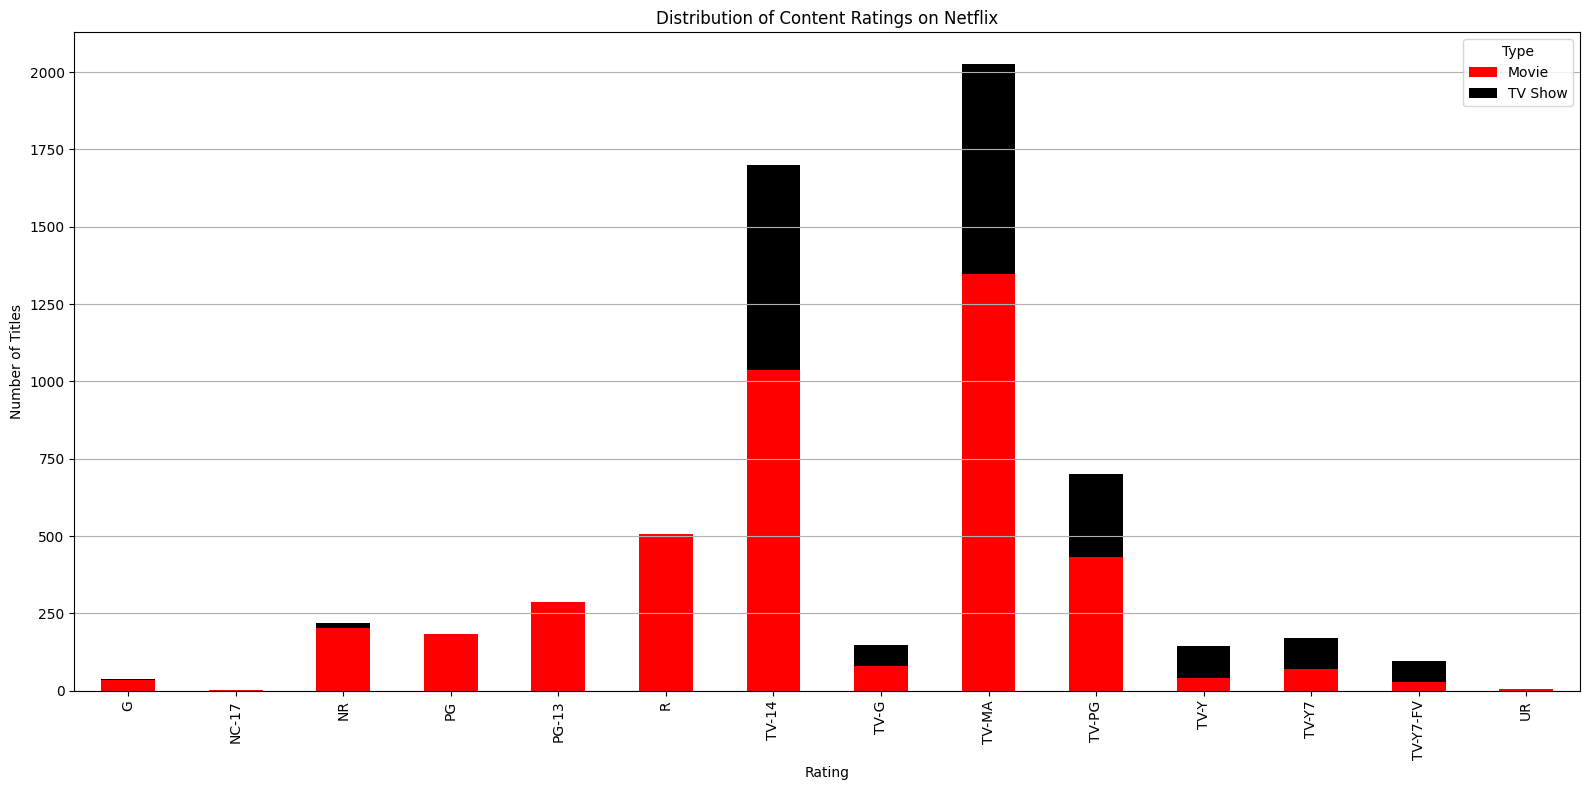

In [13]:
# Grouping by 'rating' and 'type' to get counts of movies and TV shows for each rating
rating_distribution = netflix_data.groupby(['rating', 'type']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(16, 8))
rating_distribution.plot(kind='bar', stacked=True, figsize=(16,8), ax=plt.gca(), color=['red', 'black'])
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


The bar chart showcases the distribution of content ratings for titles on Netflix:

**Mature Content:** The ratings "TV-MA" and "R" indicate content specifically designed to be viewed by adults. These ratings have a significant presence on Netflix, suggesting a large portion of adult-targeted content.

**Family and Kids Content:** Ratings such as "TV-Y", "TV-G", "TV-Y7", and "TV-PG" cater to younger audiences and families. Their presence indicates Netflix's commitment to providing content for all age groups.

**Movies vs. TV Shows:** For most ratings, there's a good mix of both movies and TV shows, suggesting a balanced content strategy.

This visualization provides insights into the diversity of content available on Netflix in terms of the intended audience.

<h1> Summary:</h1>

1. **Dataset Overview**:
   - The dataset contains information on various titles available on Netflix, including details like type (movie or TV show), title, director, cast, country of production, date added to Netflix, release year, rating, duration, genre, and a brief description.

2. **Growth Over Time**:
   - There's been a significant increase in the number of titles added to Netflix over the years, showcasing aggressive expansion and content investment.
   - While movies have been a constant addition, there's been a noticeable uptick in TV shows in recent years, indicating a shift in content strategy towards episodic content.

3. **Diversity of Content**:
   - The United States is the dominant producer of content on Netflix, followed by countries like India, the UK, and Canada. This highlights Netflix's global reach and its focus on providing diverse content.
   - A variety of content ratings are present on Netflix. There's a significant portion of content targeted towards adults (with ratings like "TV-MA" and "R"), but there's also a substantial amount of content for younger audiences and families.

4. **Ratings Distribution**:
   - Netflix hosts content with a variety of ratings, catering to a wide range of audiences.
   - Both movies and TV shows are well-represented across different ratings, suggesting a balanced content strategy.

In summary, Netflix has shown rapid growth in its content library over the years, with a diverse range of titles from different countries and for different audience groups. This strategy has likely contributed to its widespread appeal and success in the entertainment industry.